In [ ]:
# Classification and Sequence Labelling - Task 2

In [ ]:
# Loads Data

In [2]:
# Loads data using code from activity recognition
import os

data_path = "activity_recognition_dataset/S1_Dataset"

files = os.listdir(data_path)
print(files)

['d1p01M', 'd1p02M', 'd1p03M', 'd1p04M', 'd1p05M', 'd1p06M', 'd1p07M', 'd1p08F', 'd1p09F', 'd1p10F', 'd1p11F', 'd1p12F', 'd1p13F', 'd1p14F', 'd1p15F', 'd1p16F', 'd1p17F', 'd1p18F', 'd1p19F', 'd1p20F', 'd1p21F', 'd1p22F', 'd1p23F', 'd1p24F', 'd1p25F', 'd1p26F', 'd1p27F', 'd1p28F', 'd1p29F', 'd1p30F', 'd1p31F', 'd1p32F', 'd1p33F', 'd1p34F', 'd1p35F', 'd1p36M', 'd1p37M', 'd1p38M', 'd1p39M', 'd1p40M', 'd1p41M', 'd1p42M', 'd1p43M', 'd1p44M', 'd1p45M', 'd1p46M', 'd1p47M', 'd1p48M', 'd1p49F', 'd1p50F', 'd1p51F', 'd1p52F', 'd1p53F', 'd1p54F', 'd1p55F', 'd1p56F', 'd1p57F', 'd1p58F', 'd1p59F', 'd1p60F', 'README.txt']


In [3]:
import pandas as pd  # use pandas to load data from CSV files

combined_data = []

for file in files:
    
    if file == "README.txt":
        continue
    
    try:
        # load a single sequence from the file
        seq_dataframe = pd.read_csv(os.path.join(data_path, file), header=None, names=["time", "frontal acc", "vertical acc", "lateral acc", "antenna ID", "RSSI", "phase", "frequency", "label"])
        
        # put the ID of the sequence into the dataframe as an extra column
        seq_dataframe['seqID'] = file  # use filename as ID
                
        combined_data.append(seq_dataframe)  # put the data frame into a list
    except:
        print(f"Could not load file {file}. Skipping.")

In [4]:
import numpy as np

# the pandas dataframe stores data in a table with headers
input_cols = ["frontal acc", "vertical acc", "lateral acc", "RSSI", "phase", "frequency"]  # column headers for the input features
output_col = "label"  # column header for the output label

# get the relevant columns from the pandas dataframes and convert to numpy arrays
X_by_seq = []  # store a list of numpy arrays containing the input features for each sequence
y_by_seq = []  # store a list of 1-D numpy arrays containing the target activity labels for each sequence

for seq_table in combined_data:
    X_by_seq.append(seq_table[input_cols].values)
    y_by_seq.append(seq_table[output_col].values - 1)    # subtract one from the label so that labels start from 0
    
n_states = np.unique(np.concatenate(y_by_seq)).size  # how many classes/states are there?

In [5]:
from sklearn.model_selection import train_test_split

# create train/test split. Sequences are kept complete.
X_by_seq_tr, X_by_seq_test, y_by_seq_tr, y_by_seq_test = train_test_split(X_by_seq, y_by_seq, test_size=0.2, random_state=21)  # You may wish to make further splits of the data or to modify this split.

In [6]:
# Record which observations occur given each state (activity label)
X_given_y = [[] for _ in range(n_states)]  # empty list where we will record the observations that occur given each activity label

for s, X_seq in enumerate(X_by_seq_tr):
    for i in range(X_seq.shape[0]):
        state_i = y_by_seq_tr[s][i]
        X_given_y[state_i].append(X_seq[i, :][None, :])

In [7]:
from hmmlearn import hmm  # We recommend using this class if builing an HMM

# Record the mean feature values for observations in each state
means = np.zeros((n_states, len(input_cols)))

# Record the variance of feature values for observations in each state
diagonal_covars = np.zeros((n_states, len(input_cols)))

for state in range(n_states):
    means[state] = np.mean(X_given_y[state], axis=0)
    diagonal_covars[state, :] = np.var(X_given_y[state], axis=0)

In [8]:
X_tr = np.concatenate(X_by_seq_tr, axis=0)  # combine features into one matrix -- use this as input features for training a classifier
y_tr = np.concatenate(y_by_seq_tr)  # combine target labels into one list -- use this as target labels for training a classifier

In [9]:
X_test = np.concatenate(X_by_seq_test, axis=0)  # combine features into one matrix -- use this as input features for testing a classifier
y_test = np.concatenate(y_by_seq_test)  # combine target labels into one list -- use this as target labels for evaluating a classifier

In [ ]:
# End of standard data loading code

In [10]:
# Stanard helpful imports for trees
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import graphviz

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [14]:
# Trains a single tree classifier
tree_model = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=None)
tree_model.fit(X_tr, y_tr)
# Test model
print("Training set accuracy: {}".format(tree_model.score(X_tr, y_tr)))
print("Test set accuracy: {}".format(tree_model.score(X_test, y_test)))
# Visualise the Decision Tree
y_target_names = ["Bed", "Chair", "Lying", "Ambulating"]
dot_data = sklearn.tree.export_graphviz(tree_model, out_file=None, feature_names=input_cols, 
                                        class_names=y_target_names, filled=True, 
                                        rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("Decision Tree")
display(graph)

Training set accuracy: 0.9999354963555441
Test set accuracy: 0.8417880462079357



(process:10916): GLib-GIO-WARNING **: 10:42:45.571: Unexpectedly, UWP app `SharpenedProductions.FileViewerPlus4_4.3.0.0_x86__xkt78gamzntbr' (AUMId `SharpenedProductions.FileViewerPlus4_xkt78gamzntbr!SharpenedProductions.FileViewerPlus4') supports 446 extensions but has no verbs

(process:10916): GLib-GIO-WARNING **: 10:42:46.557: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2309.16.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:10916): GLib-GIO-WARNING **: 10:42:47.121: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.3.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:28240): GLib-GIO-WARNING **: 10:43:15.012: Unexpectedly, UWP app `SharpenedProductions.FileViewerPlus4_4.3.0.0_x86__xkt78gamzntbr' (AUMId `SharpenedProductions.FileViewerPlus4_xkt78gamzntbr!SharpenedProductions.FileViewerPlus4') supports 446 extensions but has no verbs



In [93]:
# Trains ensemble using adaboost
def train_ensemble(num_models, sample_size, criterion="gini", splitter="best", max_depth=None):
    # initialises the sample weights for all data points in the training set.
    sample_weights = np.ones(X_tr.shape[0])/X_tr.shape[0]
    
    epsilion = 1e-3
    alphas = []
    all_models = []
    for m in range(num_models):
        # Samples from training set
        sample_idx = np.random.choice(X_tr.shape[0], sample_size)
        X_train_sample, y_train_sample = X_tr[sample_idx], y_tr[sample_idx]
    
        # Trains model
        model = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth)
        model.fit(X_train_sample, y_train_sample, sample_weights[sample_idx])
    
        # Computes error and updates alpha weight values accoringly
        error = 1 - model.score(X_train_sample, y_train_sample, sample_weights[sample_idx])
        alpha = log((1 - error) / (error + epsilion))
        alphas.append(alpha)
        
        # Updates the sample_weights for incorrect predictions using alpha
        incorrect_preds = model.predict(X_train_sample) != y_train_sample
        sample_weights[sample_idx] *= exp(alpha * incorrect_preds)
        
        all_models.append(model)
    return all_models, alpha

In [94]:
# Defines function used to obtain prediction from ensemble
def boosting_predict(test_data, all_models, alphas):
    votes = np.zeros((test_data.shape[0], len(all_models)), dtype=np.int64)  # number of classes = 10.
    combined_predictions = np.zeros(test_data.shape[0], dtype=np.int64)

    for idx, m in enumerate(all_models):
        # Obtains votes
        preds = m.predict(test_data)
        votes[:, idx] = preds

    for test_point in range(votes.shape[0]):
        # Calculates weighted prediction
        combined_predictions[test_point] = np.argmax(np.bincount(votes[test_point]))

    return combined_predictions

In [95]:
# Task 2b - Ensemble results on test set
# Measures ensemble performance
all_models, alphas = train_ensemble(num_models=200, sample_size=200)
prediction = boosting_predict(X_tr, all_models, alphas)
accuracy = np.count_nonzero(prediction==int64(y_tr))/y_tr.shape[0]
print("Train set accuracy: {}".format(accuracy))
prediction = boosting_predict(X_test, all_models, alphas)
accuracy = np.count_nonzero(prediction==int64(y_test))/y_test.shape[0]
print("Test set accuracy: {}".format(accuracy))

Train set accuracy: 0.9211335440452385
Test set accuracy: 0.9251632345554998


In [ ]:
# Task 2c - Relationship between no models and error rate of each model and overall error
# Plots relationship between number of models and error rate
no_mod_err = []
no_mods = []
for no_models in np.arange(start=1, stop=51, step=1):
    all_models, alphas = train_ensemble(num_models=no_models, sample_size=200)
    prediction = boosting_predict(X_test, all_models, alphas)
    err = 1 - np.count_nonzero(prediction==int64(y_test))/y_test.shape[0]
    no_mod_err.append(err)
    no_mods.append(no_models)
plt.plot(no_mods, no_mod_err)
plt.xlabel('Number of Models')
plt.ylabel('Error Rate')
plt.title("Impact of Number of Base Models on Ensemble Error Rate")
plt.show()

In [ ]:
# Plots error rate of individual base models alongside overall error rate
all_models, alphas = train_ensemble(num_models=10, sample_size=200)
prediction = boosting_predict(X_test, all_models, alphas)
overall_error = 1 - np.count_nonzero(prediction==int64(y_test))/y_test.shape[0]
av_error = 0
x = 0
for mod in all_models:
    err = 1 - mod.score(X_test, y_test)
    av_error += err
    plt.bar(x, err)
    x += 1
av_error /= len(all_models)
# Plots average error and overall error
plt.axhline(av_error, color='g', label='Average base model error')
plt.axhline(overall_error, color='y', label='Ensemble error')
plt.xlabel('Base models')
plt.ylabel('Error')
plt.title("Error Rate of Individual Base Models")
plt.xticks(np.arange(0))
plt.legend()
plt.show()

In [ ]:
# Task 2c - Model hyperparameters

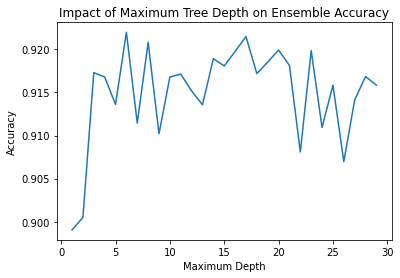

In [151]:
# Expirments with max tree depth
max_depths = np.arange(1, 30)
accs = []
no_repetitions = 3
for depth in max_depths:
    acc_tot = 0
    for rep in range(no_repetitions):
        all_models, alphas = train_ensemble(num_models=50, sample_size=200, max_depth=depth)
        prediction = boosting_predict(X_test, all_models, alphas)
        acc_tot += np.count_nonzero(prediction==int64(y_test))/y_test.shape[0]
    accs.append(acc_tot / no_repetitions)
plt.plot(max_depths, accs)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title("Impact of Maximum Tree Depth on Ensemble Accuracy")
plt.show()

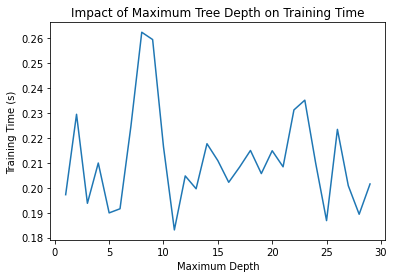

In [152]:
# Measures training time with different depths
import time
max_depths = np.arange(1, 30)
times = []
no_repetitions = 3
for depth in max_depths:
    time_tot = 0
    for rep in range(no_repetitions):
        start_time = time.time()
        all_models, alphas = train_ensemble(num_models=50, sample_size=200, max_depth=depth)
        prediction = boosting_predict(X_test, all_models, alphas)
        time_tot += float(time.time() - start_time)
    times.append(time_tot / no_repetitions)
plt.plot(max_depths, times)
plt.xlabel('Maximum Depth')
plt.ylabel('Training Time (s)')
plt.title("Impact of Maximum Tree Depth on Training Time")
plt.show()

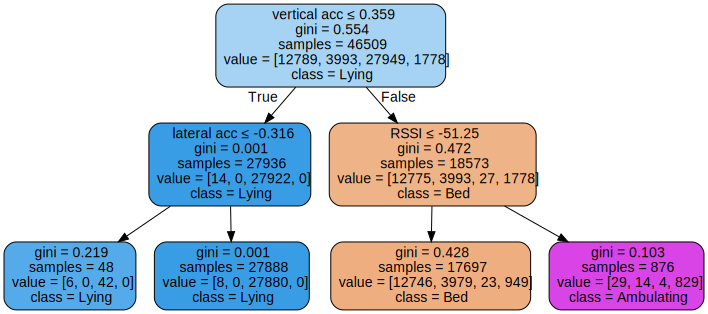

In [153]:
# Plots a depth 2 tree
tree_model = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=2)
tree_model.fit(X_tr, y_tr)
# Visualise the Decision Tree
y_target_names = ["Bed", "Chair", "Lying", "Ambulating"]
dot_data = sklearn.tree.export_graphviz(tree_model, out_file=None, feature_names=input_cols, 
                                        class_names=y_target_names, filled=True, 
                                        rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("Decision Tree")
display(graph)

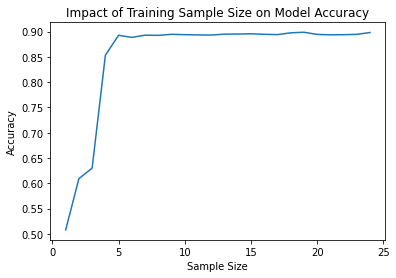

In [157]:
# Tests model performance as sample size changes
sample_sizes = np.arange(1, 25)
accs = []
no_repetitions = 3
for smp in sample_sizes:
    acc_tot = 0
    for rep in range(no_repetitions):
        all_models, alphas = train_ensemble(num_models=50, sample_size=smp)
        prediction = boosting_predict(X_test, all_models, alphas)
        acc_tot += np.count_nonzero(prediction==int64(y_test))/y_test.shape[0]
    accs.append(acc_tot / no_repetitions)
plt.plot(sample_sizes, accs)
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')
plt.title("Impact of Training Sample Size on Model Accuracy")
plt.show() 

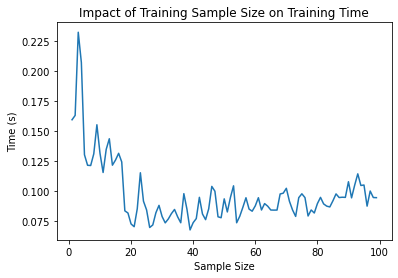

In [166]:
# Tests model training time as sample size changes
sample_sizes = np.arange(1, 100)
times = []
no_repetitions = 3
for smp in sample_sizes:
    time_tot = 0
    for rep in range(no_repetitions):
        start_time = time.time()
        all_models, alphas = train_ensemble(num_models=50, sample_size=smp)
        time_tot += float(time.time() - start_time)
    times.append(time_tot / no_repetitions)
plt.plot(sample_sizes, times)
plt.xlabel('Sample Size')
plt.ylabel('Time (s)')
plt.title("Impact of Training Sample Size on Training Time")
plt.show() 

In [168]:
# Model sensitivity measured by testing range of parameter combinations
splitter = ["best", "random"]
criterion = ["gini", "entropy", "log_loss"]
results = np.zeros((len(splitter), len(criterion)))
for split_idx in range(len(splitter)):
    for crit_idx in range(len(criterion)):
        all_models, alphas = train_ensemble(num_models=50, sample_size=200, 
                                            criterion=criterion[crit_idx], splitter=splitter[split_idx])
        prediction = boosting_predict(X_test, all_models, alphas)
        acc = np.count_nonzero(prediction==int64(y_test))/y_test.shape[0]
        results[split_idx, crit_idx] = acc

print(results)

[[0.91528545 0.89502762 0.91511803]
 [0.91595513 0.91411351 0.90289637]]
